<a href="https://colab.research.google.com/github/vilsonrodrigues/NetworkAnalysis/blob/main/flights-in-brazil/flights_in_brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Após a instalação, reinicie o runtime

In [ ]:
!pip install nxviz==0.6.3
!pip install matplotlib==3.1.3
!pip install pandas==1.3.0

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

In [ ]:
!wget - O https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/airports.csv

In [ ]:
!wget - O https://github.com/alvarofpp/dataset-flights-brazil/raw/main/data/anac.zip

In [ ]:
!apt install unzip
!unzip anac.zip

In [2]:
df_airports = pd.read_csv('/content/airports.csv')

In [3]:
df_flights = pd.read_csv('/content/anac.csv')

## Section 0.1: Data Exploration

In [4]:
df_airports.head()

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
0,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,32.896801,-97.038002
1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,40.639801,-73.7789
2,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,25.79319953918457,-80.29060363769531
3,SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.62444305419922,-43.97194290161133
4,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.8099994659,-43.2505569458


df_anac: Todos os voos no Brasil pela ANAC

In [43]:
df_airports.columns

Index(['code', 'name', 'state', 'region', 'country', 'continent',
       'Código OACI', 'lat_geo_point', 'lon_geo_point'],
      dtype='object')

In [44]:
df_anac.columns

Index(['company_abbreviation', 'company_name', 'company_nationality', 'year',
       'month', 'origin_airport_abbreviation', 'origin_airport_name',
       'origin_airport_state', 'origin_airport_region',
       'origin_airport_country', 'origin_airport_continent',
       'destination_airport_abbreviation', 'destination_airport_name',
       'destination_airport_state', 'destination_airport_region',
       'destination_airport_country', 'destination_airport_continent',
       'nature', 'flight_group', 'paid_passenger', 'free_passenger',
       'charge_paid_kg', 'charge_free_kg', 'mail_kg', 'ask', 'rpk', 'atk',
       'rtk', 'fuel_l', 'distance_flown_km', 'takeoffs', 'charge_paid_km',
       'charge_free_km', 'mail_km', 'seats', 'payload', 'fly_hours',
       'baggage_kg'],
      dtype='object')

Países presentes nesse dataset

In [53]:
df_airports.country.unique()

array(['ESTADOS UNIDOS DA AMÉRICA', 'BRASIL', 'PARAGUAI', 'URUGUAI', nan,
       'CANADÁ', 'TUNÍSIA', 'RÚSSIA', 'SENEGAL', 'FRANÇA',
       'GUIANA FRANCESA', 'CHILE', 'VENEZUELA', 'MÉXICO', 'PERU',
       'ARGENTINA', 'ESPANHA', 'COLÔMBIA', 'ITÁLIA', 'REINO UNIDO',
       'BAHAMAS', 'ALEMANHA', 'REPÚBLICA DOMINICANA', 'HOLANDA',
       'NÃO IDENTIFICADO', 'CURAÇAO', 'PANAMÁ', 'CUBA', 'ANGOLA',
       'EQUADOR', 'JAPÃO', 'COREIA DO SUL', 'BOLÍVIA',
       'TRINIDAD E TOBAGO', 'SURINAME', 'CABO VERDE', 'ÁFRICA DO SUL',
       'SUÍÇA', 'PORTUGAL', 'MOÇAMBIQUE', 'GANA', 'ARUBA',
       'ILHA DE SÃO MARTINHO', 'ILHAS FEROÉ', 'ILHAS CANÁRIAS', 'BÉLGICA',
       'HAITI', 'GUATEMALA', 'PORTO RICO', 'NICARÁGUA', 'LUXEMBURGO',
       'EMIRADOS ÁRABES UNIDOS', 'ÍNDIA', 'HONG KONG', 'NIGÉRIA',
       'CAMARÕES', 'ETIÓPIA', 'GABÃO', 'COSTA RICA', 'ALBÂNIA',
       'CAZAQUISTÃO', 'AUSTRÁLIA', 'CHINA', 'QUÊNIA', 'SRI LANKA',
       'MACAU', 'QUIRGUISTÃO', 'NAMÍBIA', 'GUINÉ', 'ARÁBIA SAUDITA',
      

As regiões são apenas as que tem ligações com o Brasil. Todas as outras são nan, '' ou não identificado

In [46]:
df_airports.region.unique()

array([nan, 'SUDESTE', 'SUL', 'NORDESTE', 'NORTE', 'CENTRO-OESTE',
       'NÃO IDENTIFICADO', ' '], dtype=object)

Mesmo caso se repete aos estados. Estão presente os 26 estados mais o Distrito Federal

In [55]:
print(df_airports.state.unique())
len(df_airports.state.unique())-2

[nan 'MG' 'RJ' 'SP' 'PR' 'ES' 'RS' 'BA' 'SE' 'AL' 'PE' 'RR' 'SC' 'PA' 'DF'
 'MS' 'MT' 'AM' 'CE' 'GO' 'MA' 'PB' 'AP' 'RN' 'TO' 'RO' 'PI' 'AC' ' ']


27

## Section 0.2: Pre-Processing

In [56]:
df_airports.columns

Index(['code', 'name', 'state', 'region', 'country', 'continent',
       'Código OACI', 'lat_geo_point', 'lon_geo_point'],
      dtype='object')

In [58]:
df_flights.columns

Index(['company_abbreviation', 'company_name', 'company_nationality', 'year',
       'month', 'origin_airport_abbreviation', 'origin_airport_name',
       'origin_airport_state', 'origin_airport_region',
       'origin_airport_country', 'origin_airport_continent',
       'destination_airport_abbreviation', 'destination_airport_name',
       'destination_airport_state', 'destination_airport_region',
       'destination_airport_country', 'destination_airport_continent',
       'nature', 'flight_group', 'paid_passenger', 'free_passenger',
       'charge_paid_kg', 'charge_free_kg', 'mail_kg', 'ask', 'rpk', 'atk',
       'rtk', 'fuel_l', 'distance_flown_km', 'takeoffs', 'charge_paid_km',
       'charge_free_km', 'mail_km', 'seats', 'payload', 'fly_hours',
       'baggage_kg'],
      dtype='object')

Primeiro vamos criar um grafo não-direcionado contendo o código do voo, o país, latitude e longitude, e a região.

In [5]:
# Create a graph
G = nx.Graph()

# Add nodes
for index, row in df_airports.iterrows():
    G.add_node(row['code'],
               name=row['name'],
               country=row['country'],
               region=row['region'],
               state=row['state']
               )

Podemos visualizar o número de Nodes e Edges. Como esperado, não temos nenhum link entre os nodes


In [6]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1083 nodes and 0 edges


No dataset de voos da Anac vamos coletar os campos que contêm as siglas da origem e do destino do voô. Mantemos apenas onde não existe campos NaN. Com isso podemos realizar os Links entre os Nodes

In [64]:
df_flights.columns

Index(['company_abbreviation', 'company_name', 'company_nationality', 'year',
       'month', 'origin_airport_abbreviation', 'origin_airport_name',
       'origin_airport_state', 'origin_airport_region',
       'origin_airport_country', 'origin_airport_continent',
       'destination_airport_abbreviation', 'destination_airport_name',
       'destination_airport_state', 'destination_airport_region',
       'destination_airport_country', 'destination_airport_continent',
       'nature', 'flight_group', 'paid_passenger', 'free_passenger',
       'charge_paid_kg', 'charge_free_kg', 'mail_kg', 'ask', 'rpk', 'atk',
       'rtk', 'fuel_l', 'distance_flown_km', 'takeoffs', 'charge_paid_km',
       'charge_free_km', 'mail_km', 'seats', 'payload', 'fly_hours',
       'baggage_kg'],
      dtype='object')

In [7]:
# Add edges
df_edges = df_flights[[
    'origin_airport_abbreviation',
    'destination_airport_abbreviation'
]].dropna()

In [43]:
df_edges

,origin_airport_abbreviation,destination_airport_abbreviation
0,KDFW,SBGR
1,KJFK,SBGL
2,KJFK,SBGR
3,KMIA,SBCF
4,KMIA,SBGL
...,...,...
904670,SEGU,SBEG
904671,SEGU,SBGR
904672,KMIA,SAEZ
904673,KMIA,SBEG


Agrupa para ver o número de voos entre aeroportos

In [8]:
df_edges = df_edges.groupby(df_edges.columns.tolist(), as_index=False).size()

In [9]:
df_edges

,origin_airport_abbreviation,destination_airport_abbreviation,size
0,1AON,SBBE,5
1,1AON,SBBR,1
2,1AON,SBCJ,5
3,1AON,SBMA,4
4,1AON,SBMC,1
...,...,...,...
15164,ZSPD,UUEE,1
15165,ZSQD,EHAM,1
15166,ZSSS,EDDF,1
15167,ZSSS,SBGL,1


A média de voos entre aeroportos é de 59 voos. Sendo a ligação máxima de 4284

In [10]:
df_edges.describe()

,size
count,15169.000000
mean,59.295998
std,195.625696
min,1.000000
25%,1.000000
50%,3.000000
75%,24.000000
max,4284.000000


In [11]:
df_edges.head(2)

,origin_airport_abbreviation,destination_airport_abbreviation,size
0,1AON,SBBE,5
1,1AON,SBBR,1


In [48]:
G.nodes(data=True)

NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}, 'SBCF': {'name': 'CONFINS', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'MG'}, 'SBGL': {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'RJ'}, 'SBGR': {'name': 'GUARULHOS', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'SP'}, 'SGAS': {'name': 'ASUNCIÓN', 'country': 'PARAGUAI', 'region': nan, 'state': nan}, 'SSUM': {'name': 'UMUARAMA', 'country': 'BRASIL', 'region': 'SUL', 'state': 'PR'}, 'SUMU': {'name': 'MONTEVIDEO, MONTEVIDEO', 'country': 'URUGUAI', 'region': nan, 'state': nan}, nan: {'name': nan, 'country': nan, 'region': nan, 'state': nan}, 'SNBG': {'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'region':

Adicionando ao Grafo os links de mesmo Code. Garatindo que não tem destino e origem como o mesmo. Adicionamos o parâmetro de número de viagens entre eles

In [12]:
for _, row in df_edges.iterrows():
    if row['origin_airport_abbreviation'] == row['destination_airport_abbreviation']:
        continue
    G.add_edge(row['origin_airport_abbreviation'], row['destination_airport_abbreviation'], flight_count=row['size'])

Podemos ver os subgrafos

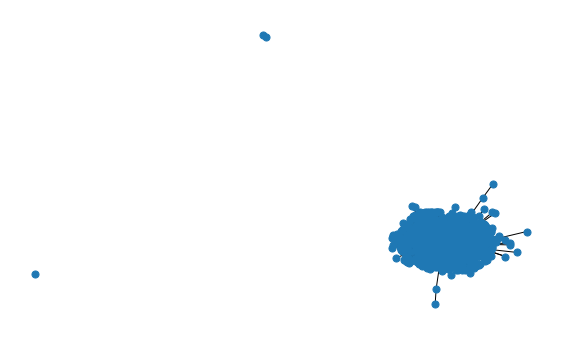

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
nx.draw(G, node_size=50, ax = ax)
plt.show()

In [51]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1083 nodes and 9613 edges


In [52]:
G.nodes(data=True)

NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}, 'SBCF': {'name': 'CONFINS', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'MG'}, 'SBGL': {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'RJ'}, 'SBGR': {'name': 'GUARULHOS', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'SP'}, 'SGAS': {'name': 'ASUNCIÓN', 'country': 'PARAGUAI', 'region': nan, 'state': nan}, 'SSUM': {'name': 'UMUARAMA', 'country': 'BRASIL', 'region': 'SUL', 'state': 'PR'}, 'SUMU': {'name': 'MONTEVIDEO, MONTEVIDEO', 'country': 'URUGUAI', 'region': nan, 'state': nan}, nan: {'name': nan, 'country': nan, 'region': nan, 'state': nan}, 'SNBG': {'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'region':

In [53]:
G.edges(data=True)

EdgeDataView([('KDFW', 'KAUS', {'flight_count': 6}), ('KDFW', 'KDAL', {'flight_count': 1}), ('KDFW', 'EBBR', {'flight_count': 5}), ('KDFW', 'KHDO', {'flight_count': 1}), ('KDFW', 'KIAH', {'flight_count': 4}), ('KDFW', 'KLAX', {'flight_count': 2}), ('KDFW', 'KMEM', {'flight_count': 1}), ('KDFW', 'KMIA', {'flight_count': 4}), ('KDFW', 'KRSW', {'flight_count': 1}), ('KDFW', 'MDPC', {'flight_count': 1}), ('KDFW', 'MPTO', {'flight_count': 3}), ('KDFW', 'OMSJ', {'flight_count': 4}), ('KDFW', 'SBBR', {'flight_count': 2}), ('KDFW', 'SBCF', {'flight_count': 25}), ('KDFW', 'SBCR', {'flight_count': 1}), ('KDFW', 'SBEG', {'flight_count': 2}), ('KDFW', 'SBFC', {'flight_count': 1}), ('KDFW', 'SBGL', {'flight_count': 73}), ('KDFW', 'SBGR', {'flight_count': 285}), ('KDFW', 'SBKP', {'flight_count': 8}), ('KDFW', 'SBRF', {'flight_count': 1}), ('KDFW', 'SBRG', {'flight_count': 2}), ('KDFW', 'SCEL', {'flight_count': 1}), ('KDFW', 'SGAS', {'flight_count': 1}), ('KDFW', 'SVMI', {'flight_count': 1}), ('KDFW'

Exportando como graphml

In [14]:
nx.write_graphml(G, 'air_traffic.graphml')

## Section 1: Assortatividade da rede considernado o atribudo de Região

In [74]:
Gx = nx.read_graphml('air_traffic.graphml')

In [89]:
Gx.edges(data=True)

EdgeDataView([('SBCF', 'SBAE', {'flight_count': 2}), ('SBCF', 'SBAQ', {'flight_count': 1}), ('SBCF', 'SBAR', {'flight_count': 181}), ('SBCF', 'SBAS', {'flight_count': 4}), ('SBCF', 'SBAT', {'flight_count': 3}), ('SBCF', 'SBAU', {'flight_count': 4}), ('SBCF', 'SBAX', {'flight_count': 81}), ('SBCF', 'SBBE', {'flight_count': 378}), ('SBCF', 'SBBH', {'flight_count': 363}), ('SBCF', 'SBBR', {'flight_count': 1286}), ('SBCF', 'SBBV', {'flight_count': 18}), ('SBCF', 'SBBW', {'flight_count': 1}), ('SBCF', 'SBCA', {'flight_count': 2}), ('SBCF', 'SBCB', {'flight_count': 167}), ('SBCF', 'SBBT', {'flight_count': 1}), ('SBCF', 'SBCG', {'flight_count': 138}), ('SBCF', 'SBCH', {'flight_count': 11}), ('SBCF', 'SBCJ', {'flight_count': 251}), ('SBCF', 'SBCN', {'flight_count': 67}), ('SBCF', 'SBCP', {'flight_count': 10}), ('SBCF', 'SBCR', {'flight_count': 1}), ('SBCF', 'SBCT', {'flight_count': 657}), ('SBCF', 'SBCX', {'flight_count': 3}), ('SBCF', 'SBCY', {'flight_count': 307}), ('SBCF', 'SBDN', {'flight_

In [56]:
for key, value in dict(Gx.nodes(data=True)).items():
	print(key,':',value)

KDFW : {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}
KJFK : {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}
KMIA : {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'region': nan, 'state': nan}
SBCF : {'name': 'CONFINS', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'MG'}
SBGL : {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'RJ'}
SBGR : {'name': 'GUARULHOS', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'SP'}
SGAS : {'name': 'ASUNCIÓN', 'country': 'PARAGUAI', 'region': nan, 'state': nan}
SSUM : {'name': 'UMUARAMA', 'country': 'BRASIL', 'region': 'SUL', 'state': 'PR'}
SUMU : {'name': 'MONTEVIDEO, MONTEVIDEO', 'country': 'URUGUAI', 'region': nan, 'state': nan}
nan : {'name': nan, 'country': nan, 'region': nan, 'state': nan}
SNBG : {'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'ES'}
KMCO :

Como falado na exploração temos casos em que a região não são as desejadas, vamos remover

In [71]:
airports = pd.read_csv('airports.csv')
list_rm = []
for index in range(len(airports['region'])):
	if type(airports['region'][index]) == type(float(0)) or airports['region'][index]=='NÃO IDENTIFICADO':
		list_rm.append(list(airports['code'])[index])

In [72]:
print('number of airports to be deleted:', len(list_rm))
list_rm

number of airports to be deleted: 587


['KDFW',
 'KJFK',
 'KMIA',
 'SGAS',
 'SUMU',
 nan,
 'KMCO',
 'CYYZ',
 'DTTA',
 'UUEE',
 'GOOY',
 'LFPG',
 'SOCA',
 'SCEL',
 'SVPR',
 'MMMX',
 'MMUN',
 'SPIM',
 'SAEZ',
 'LEMD',
 'SABE',
 'SACO',
 'SAAR',
 'SKBO',
 'LIMC',
 'LIRF',
 'EGKK',
 'LFBO',
 'MYNN',
 'KMSY',
 'EDDV',
 'EDDT',
 'MDSD',
 'EHAM',
 'LEAS',
 'LETO',
 'N/I',
 'TNCC',
 'KYIP',
 'MPTO',
 'KEWR',
 'KIAH',
 'MUHA',
 'KATL',
 'EDDF',
 'FNLU',
 'SEGU',
 'SEQU',
 'KMEM',
 'SVVA',
 'SVMI',
 'KLAX',
 'RJAA',
 'RKSS',
 'SGES',
 'KSAT',
 'KMAI',
 'SAME',
 'SLVR',
 'TTPP',
 'SMPB',
 'SULS',
 'SURV',
 'GVAC',
 'FAJS',
 'SMJP',
 'LSZH',
 'LPPT',
 'FQMA',
 'SAZS',
 'EHWO',
 'LPFR',
 'DGAA',
 'KSHR',
 'LPPR',
 'LEPA',
 'MDPC',
 'TNCA',
 'TNCM',
 'KORD',
 'EGLL',
 'EKCH',
 'KLAS',
 'MMAA',
 'RJNN',
 'SLLP',
 'SUPE',
 'SKCL',
 'GCLP',
 'EDDM',
 'PANC',
 'KADW',
 'SVMG',
 'MUCM',
 'SPSO',
 'KFLL',
 'KOSC',
 'KPBI',
 'EBBB',
 'LEBL',
 'SELT',
 'SARO',
 'CYUL',
 'KIAD',
 'SARI',
 'SEQM',
 'EDFH',
 'SKBQ',
 'KMCN',
 'MTPP',
 'KGUS',
 'MGG

Removendo NaN e a lista de aeroportos que não tem as regiões de interesse

In [75]:
#Gx.remove_node('nan')
Gx.remove_nodes_from(list_rm)

CircosPlot

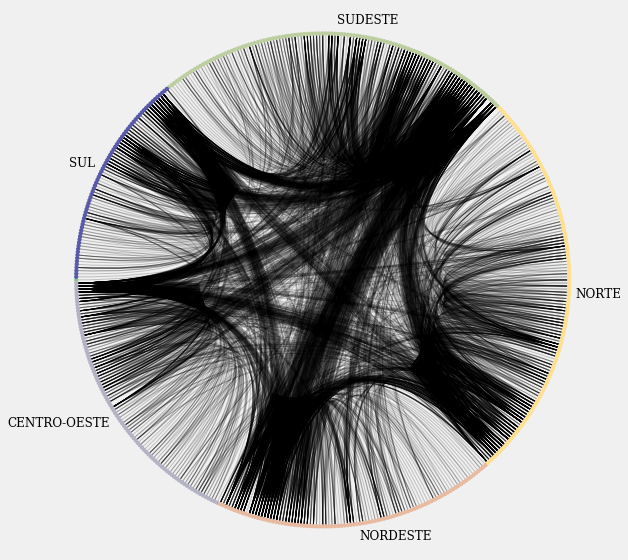

In [107]:
c = nv.CircosPlot(Gx, 
      node_color='region',
			node_grouping='region',
			node_order='region',
			node_labels=False,
			group_label_position='middle',
			group_label_color=False,
			figsize=(12,8),
			nodeprops={'radius':0.7},
			fontsize=12)

c.draw()
c.figure.tight_layout()

plt.show()

Vemos no gráfico acima que todas as regiões de aeroportos estão se conectando. As regiões norte e sudeste são as que mais tem conexões recebidas. Podemos observar também que existem muitos voos que vão para um aeroporto da mesma região. Existe uma conexão bastante forte entre aeroportos do nordeste e do sudeste.

Esse tipo de evento é medido pela assortatividade e é chamado de Homofilia. Temos que cerca de 0.37 das viagens são entre as próprias regiões. Se esse número fosse negativo, a rede se chamaria desassortativa. 

In [93]:
nx.attribute_assortativity_coefficient(Gx,'region')

0.36715369332586845

Podemos ver a matrix de conexões e vemos que o traço dela tem cerca de 1/3 das conexões, confirmando o valor informado pela assortatividade

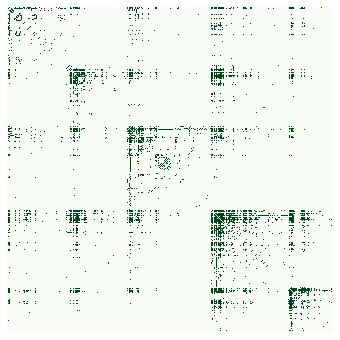

In [98]:
m = nv.MatrixPlot(Gx, node_color="region", 
                  node_order="region")


# Change the cmap prior to drawing.
m.cmap = plt.cm.get_cmap("Greens")

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

## Section 2: Análise Bivariada

In [99]:
nx.average_degree_connectivity(Gx).items()

dict_items([(126, 47.80952380952381), (128, 49.2109375), (168, 41.17261904761905), (7, 66.00714285714285), (0, 0), (1, 115.0945945945946), (16, 71.484375), (130, 47.09230769230769), (9, 64.09722222222223), (12, 56.13095238095238), (61, 71.45901639344262), (72, 67.27777777777777), (47, 80.74468085106383), (34, 66.91176470588235), (151, 44.29139072847682), (53, 73.43867924528301), (83, 62.63855421686747), (10, 55.875), (14, 67.04081632653062), (18, 63.898148148148145), (49, 81.85714285714286), (112, 48.044642857142854), (159, 41.22641509433962), (137, 46.824817518248175), (87, 61.11494252873563), (55, 62.07272727272727), (48, 72.47916666666667), (119, 48.99159663865546), (127, 45.71653543307087), (60, 70.29444444444445), (31, 77.83870967741936), (97, 57.2680412371134), (132, 44.84848484848485), (46, 69.03260869565217), (52, 74.0), (66, 64.9090909090909), (79, 64.82278481012658), (71, 68.1830985915493), (6, 62.49074074074074), (81, 64.98765432098766), (77, 60.1948051948052), (102, 56.4215

Degree(grau) médio dos vizinhos 

In [100]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

In [103]:
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

Em uma rede assortativa, Nodes com maior Degree tendem a se conectar com outros nós de maior grau. No gráfico abaixo, temos que Nodes com alto Degree tende a ter um Grau Médio de Vizinhos alto, mas que acaba descrescendo, mesmo que pouco, conforme aumenta o Degree desse Node

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


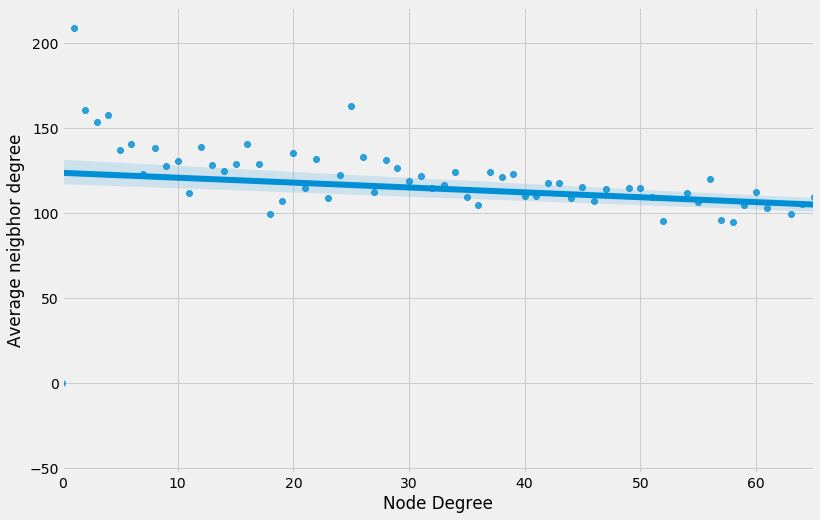

In [104]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

plt.show()

## Section 3: Componentes Conectados

O nosso subgrago é totalmente conectado?

In [108]:
nx.is_connected(Gx)

False

Quantos componentes conectados existem na malha área brasileira?

In [109]:
nx.number_connected_components(Gx)

5

Temos 5 componentes. Sendo 4 deles conectado por apenas ele mesmo. E temos um subgrafo maior com 492 conexões

In [127]:
for component in nx.connected_components(Gx):
  print(len(component), component)  

492 {'SNBI', 'SWYN', 'SNWS', 'SSJA', 'SISO', 'SIFV', 'SJHG', 'SJQP', 'SBTK', 'SIGP', 'SBCH', 'SNML', 'SWCA', 'SNFO', 'SBRD', 'SNUB', 'SJTS', 'SDTF', 'SILJ', 'SNZA', 'SBAG', 'SIQE', 'SWPF', 'SNPX', 'SDCG', 'SNPV', 'SBCT', 'SDPA', 'SNMX', 'SSNM', 'SWBG', 'SNIP', 'KDAL', 'SBNF', 'SBAN', 'SBIT', 'SDBK', 'SBPG', 'SSKM', 'SSPK', 'SBVC', 'SBTC', 'SWNH', 'SNBU', 'SSPI', 'SBPA', 'SBIH', 'SBRB', 'SNUC', 'SNAP', 'SWRF', 'SJGU', 'SNJM', 'SBME', 'SDCO', 'SBAU', 'SNCC', 'SNBM', 'SBDB', 'SBBE', 'SSFB', 'SNPD', 'SWHG', 'SNGV', 'SSLS', 'SBJI', 'SBAX', 'SBAC', 'SNKK', 'SBSJ', 'SSBG', 'SBBW', 'SWII', 'SJQK', 'SBTT', 'SWLV', 'SNBW', 'SNRS', 'SWQR', 'SNQD', 'SDIM', 'SDRS', 'SWCD', 'SWVR', 'SBBG', 'SSSK', 'SWKN', 'SWJN', 'SSCL', 'SJDB', 'SNNG', 'SWTU', 'SNGX', 'SWSQ', 'SNVB', 'SWLF', 'SNBA', 'SBDO', 'SWCI', 'SWPY', 'SBBI', 'SBAE', 'SBJF', 'SBLP', 'SNMJ', 'SDVG', 'SNQX', 'SWDB', 'SNTO', 'SNSW', 'SSPG', 'SBKG', 'SDFR', 'SBZM', 'SBSP', 'SNUI', 'SNYV', 'SWAE', 'SBSG', 'SNVR', 'SNVC', 'SBLE', 'SJUR', 'SDUB', 'SS

Número de aeroportos por região

In [161]:
df_airports.groupby(['region'])['name'].count().reset_index(name='total')

,region,total
0,,1
1,CENTRO-OESTE,89
2,NORDESTE,92
3,NORTE,128
4,NÃO IDENTIFICADO,1
5,SUDESTE,116
6,SUL,70


In [138]:
df_airports[df_airports['code'] == 'SNBG']

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
10,SNBG,BAIXO GUANDU,ES,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.499000549316406,-41.04180145263672


Então a porcentagem desse componente nessa região será de menos de 1%

In [145]:
(1/116)*100

0.8620689655172413

Para o aeroporto a seguir da cidade de Campuã, a porcentagem de participação dele na região é de 1.12%

In [146]:
df_airports[df_airports['code'] == 'SSBE']

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
547,SSBE,CAMAPUÃ,MS,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.598400115966797,-54.02109909057617


In [147]:
(1/89)*100

1.1235955056179776

O aeroporto de Cumaru do Norte, pertence a região Norte e tem uma partipação na região de 0.78%

In [148]:
df_airports[df_airports['code'] == 'SNGR']

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
659,SNGR,CUMARU DO NORTE,PA,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-7.783610820770264,-51.133888244628906


In [149]:
(1/128)*100

0.78125

O Aeroporto de Eirunepé pertence a região Norte. Sua particapação na região também será de 0.78%

In [150]:
df_airports[df_airports['code'] == 'SBER']

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
1033,SBER,EIRUNEPÉ,AM,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-6.663039999999967,-69.86730999999997


Por último, temos o componente maior que está presente em todas as regiões

In [152]:
for component in nx.connected_components(Gx):
  gcc = component
  break

Realizando Merge utilizando o Inner para saber quais regiões pertence o componente

In [157]:
df_gcc = pd.DataFrame(gcc,columns=['code'])

In [159]:
df_inner_airports = pd.merge(df_airports,df_gcc,on='code',how='inner')
df_inner_airports.head(4)

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
0,SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.62444305419922,-43.97194290161133
1,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.8099994659,-43.2505569458
2,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-23.435556411743164,-46.47305679321289
3,SSUM,UMUARAMA,PR,SUL,BRASIL,AMÉRICA DO SUL,NaN,-23.7987003326416,-53.31380081176758


In [162]:
df_inner_airports.groupby('region')['code'].count().reset_index(name='max_gcc')

,region,max_gcc
0,,1
1,CENTRO-OESTE,88
2,NORDESTE,92
3,NORTE,126
4,SUDESTE,115
5,SUL,70


Por região

In [163]:
print('Centro-Oeste ',(88/89)*100,'%')
print('Nordeste ',(92/92)*100,'%')
print('Norte ',(126/128)*100,'%')
print('Sudeste ',(115/116)*100,'%')
print('Sul ',(70/70)*100,'%')

Centro-Oeste  98.87640449438202 %
Nordeste  100.0 %
Norte  98.4375 %
Sudeste  99.13793103448276 %
Sul  100.0 %


## Section 4: Coeficiente de Clustering

In [15]:
Gy = nx.read_graphml('air_traffic.graphml')

Coeficiente de Clustering de cada nó. Esse coeficiente nos diz como um nó está relacionado com seus vizinhos.

Quantos triângulos podem ser formados por cada a partir de um Node? Dado a quantidade possível de triângulos, quantos são formados

Isso também é chamado de Friend-of-a-Friend

In [16]:
nx.clustering(Gy)

{'KDFW': 0.3663865546218487,
 'KJFK': 0.4241788958770091,
 'KMIA': 0.15506650285775334,
 'SBCF': 0.13760683760683762,
 'SBGL': 0.07569825436408978,
 'SBGR': 0.06240983685917607,
 'SGAS': 0.5015220700152208,
 'SSUM': 0.6428571428571429,
 'SUMU': 0.3386000679578661,
 'nan': 0,
 'SNBG': 0.6666666666666666,
 'KMCO': 0.5005537098560354,
 'SSBG': 0.45454545454545453,
 'SBCV': 0.6691176470588235,
 'SBLP': 0.5555555555555556,
 'SBSV': 0.162205910031997,
 'SNGI': 0.7222222222222222,
 'SNTF': 0.7878787878787878,
 'SBAR': 0.6,
 'SBMO': 0.44177732379979573,
 'SBPL': 0.5103825136612021,
 'SNBR': 0.5953654188948306,
 'SNVR': 0,
 'CYYZ': 0.5909090909090909,
 'DTTA': 1.0,
 'UUEE': 0.47368421052631576,
 'GOOY': 0.2632524707996406,
 'LFPG': 0.35421994884910485,
 'SBKP': 0.07194161260426321,
 'SOCA': 0.679144385026738,
 'SCEL': 0.2022635998539613,
 'SBBV': 0.30522088353413657,
 'SVPR': 1.0,
 'MMMX': 0.4082815734989648,
 'MMUN': 0.37681159420289856,
 'SPIM': 0.3183345780433159,
 'SAEZ': 0.2222043054099814

Valor médio (Neighbors > 2)

In [17]:
nx.average_clustering(Gy)

0.6336945242575216

## Section 5: Paths

In [19]:
Gz = nx.read_graphml('air_traffic.graphml')

In [21]:
df_airports.head(2)

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
0,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,32.896801,-97.038002
1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,40.639801,-73.7789


Vamos fazer uma simulação. Qual seria o caminho mais curto para cada trajeto entre aeroportos?

Situação 1. Vamos sair de um aeroporto do Norte para o Sul

Vamos escolher aleatóriamente os Nodes

In [23]:
df_airports[df_airports['region']=='NORTE'].sample()

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
931,SJNP,NOVO PROGRESSO,PA,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-7.125833,-55.400833


In [24]:
df_airports[df_airports['region']=='SUL'].sample()

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
398,SSCN,CANELA,RS,SUL,BRASIL,AMÉRICA DO SUL,NaN,-29.37019920349121,-50.832000732421875


E esse seria o caminho mais curto (estou desprezando KM nesse experimento)

In [25]:
nx.shortest_path(Gz,'SJNP','SSCN')

['SJNP', 'SBCY', 'SBPA', 'SSCN']

Agora digamos que queremos sair de Canela para uma cidade do Nordeste

In [26]:
df_airports[df_airports['region']=='NORDESTE'].sample()

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
749,SNPP,CAIRUI,BA,NORDESTE,BRASIL,AMÉRICA DO SUL,NaN,-13.428781,-38.913689


In [27]:
nx.shortest_path(Gz,'SSCN','SNPP')

['SSCN', 'SBPA', 'SBGO', 'SNPP']

Agora vamos viajar ao Centro-Oeste!

In [28]:
df_airports[df_airports['region']=='CENTRO-OESTE'].sample()

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
399,SSOU,ARIPUANÃ,MT,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,NaN,-17.036942,-46.260277


In [29]:
nx.shortest_path(Gz,'SNPP','SSOU')

['SNPP', 'SBGO', 'SBCY', 'SSOU']

Por fim, vamos completar o nosso voo saindo do Aripuanã para uma cidade do Sudeste. Nossa rota aleatória caiu no RJ, vamos conhecer a Gávea percorrendo esse 'caminho mais curto'

In [30]:
df_airports[df_airports['region']=='SUDESTE'].sample()

,code,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
4,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.8099994659,-43.2505569458


In [31]:
nx.shortest_path(Gz,'SSOU','SBGL')

['SSOU', 'SBCY', 'SBGL']

Obrigado por ler!